# Project 1
### Epidemiological Study: US Vaccination Campaign (November 2020 - March 2021)
---
### Project Description/Outline
Determine the effectiveness of the US vaccination campaign in attending the population that is most affected by covid-19 disease. This is achieved by revising the total number of doses applied, vaccination coverage, population demographics such as gender, race, socioeconomic status, and education, versus epidemiologic variables: incidence, prevalence, hospitalization, UCI, death numbers.

In [1]:
## Dependencies
import pandas as pd
import requests
import matplotlib.pyplot as plt


### Covid-19 Vaccination Data

In [2]:
## Import data from CSV
hesitancy_df = pd.read_csv('data/Vaccine_Hesitancy_Covid19.csv')#, encoding='latin-1')
hesitancy_df.head()

,FIPS Code,County Name,State,Estimated hesitant,Estimated strongly hesitant,Social Vulnerability Index (SVI),SVI Category,CVAC level of concern for vaccination rollout,CVAC Level Of Concern,Percent adults fully vaccinated against COVID-19,Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,Geographical Point,State Code,County Boundary,State Boundary
0,1131,"Wilcox County, Alabama",ALABAMA,0.23,0.11,0.93,Very High Concern,0.94,Very High Concern,0.228,0.0053,0.0009,0.0003,0.6938,0.0000,0.2684,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-87.52534299999999 32.132773, ...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
1,1129,"Washington County, Alabama",ALABAMA,0.23,0.11,0.73,High Concern,0.82,Very High Concern,0.192,0.0146,0.0731,0.0025,0.2354,0.0000,0.6495,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-88.45317899999999 31.505388, ...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
2,1133,"Winston County, Alabama",ALABAMA,0.22,0.11,0.70,High Concern,0.80,High Concern,0.085,0.0315,0.0034,0.0016,0.0073,0.0005,0.9370,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-87.63656399999999 34.120908, ...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
3,1127,"Walker County, Alabama",ALABAMA,0.23,0.11,0.75,High Concern,0.68,High Concern,0.158,0.0249,0.0015,0.0049,0.0617,0.0000,0.8895,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-87.56108499999999 33.868713, ...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
4,2013,"Aleutians East Borough, Alaska",ALASKA,0.26,0.12,0.58,Moderate Concern,0.87,Very High Concern,0.195,0.0901,0.4588,0.1968,0.0322,0.0100,0.1321,POINT (-151.631889 63.631126),AK,"MULTIPOLYGON (((-165.036163 54.576598, -165.01...","MULTIPOLYGON (((-165.254162 60.917108, -165.30..."


### Pendiente
- Retrieve lat,lng as columns by fips
- "POINT (-86.844516 32.756889)	"
- separate


In [3]:
columns = [
    'FIPS Code',
    'Social Vulnerability Index (SVI)',
    'SVI Category',
    'Percent adults fully vaccinated against COVID-19',
    'Percent Hispanic',
    'Percent non-Hispanic American Indian/Alaska Native',
    'Percent non-Hispanic Asian',
    'Percent non-Hispanic Black',
    'Percent non-Hispanic Native Hawaiian/Pacific Islander',
    'Percent non-Hispanic White'
]

vaccination_df = hesitancy_df[columns].sort_values('FIPS Code')
vaccination_df.reset_index(inplace=True, drop=True)

vaccination_df['Percent non-Hispanic Other'] = 1 - vaccination_df.iloc[:,4:10].sum(axis=1)
vaccination_df.head()

# del hesitancy_df

,FIPS Code,Social Vulnerability Index (SVI),SVI Category,Percent adults fully vaccinated against COVID-19,Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,Percent non-Hispanic Other
0,1001,0.44,Moderate Concern,0.114,0.0283,0.0025,0.0103,0.1900,0.0001,0.7460,0.0228
1,1003,0.22,Low Concern,0.176,0.0456,0.0065,0.0092,0.0917,0.0000,0.8307,0.0163
2,1005,1.00,Very High Concern,0.128,0.0436,0.0029,0.0048,0.4744,0.0000,0.4581,0.0162
3,1007,0.60,High Concern,0.115,0.0257,0.0013,0.0012,0.2214,0.0000,0.7453,0.0051
4,1009,0.42,Moderate Concern,0.095,0.0926,0.0007,0.0037,0.0153,0.0004,0.8689,0.0184


In [4]:
vaccination_df.sort_values('Percent adults fully vaccinated against COVID-19', ascending=False).head(20)

,FIPS Code,Social Vulnerability Index (SVI),SVI Category,Percent adults fully vaccinated against COVID-19,Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,Percent non-Hispanic Other
412,13053,0.64,High Concern,0.912,0.1586,0.0028,0.0289,0.1988,0.0014,0.5758,0.0337
84,2180,0.93,Very High Concern,0.622,0.0274,0.7435,0.0153,0.0083,0.0014,0.1466,0.0575
90,2230,0.17,Very Low Concern,0.603,0.0569,0.0506,0.0081,0.0334,0.0000,0.8211,0.0299
1615,30035,0.86,Very High Concern,0.601,0.0328,0.6434,0.0004,0.0028,0.0009,0.2994,0.0203
94,2282,0.59,Moderate Concern,0.581,0.0770,0.3606,0.0493,0.0077,0.0123,0.4330,0.0601
87,2195,0.67,High Concern,0.580,0.1170,0.0731,0.0457,0.0101,0.0058,0.6549,0.0934
1600,30005,0.92,Very High Concern,0.566,0.0354,0.5004,0.0010,0.0040,0.0000,0.4456,0.0136
89,2220,0.40,Moderate Concern,0.550,0.0676,0.1230,0.0666,0.0071,0.0009,0.6157,0.1191
95,2290,0.88,Very High Concern,0.537,0.0266,0.6837,0.0071,0.0007,0.0004,0.2155,0.0660
1357,27087,0.87,Very High Concern,0.524,0.0434,0.3836,0.0035,0.0053,0.0020,0.4536,0.1086


In [5]:
vaccination_df.shape

(3142, 11)

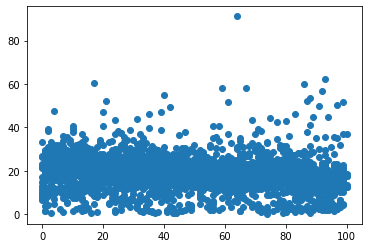

In [6]:
x_values = vaccination_df['Social Vulnerability Index (SVI)']*100
y_values = vaccination_df['Percent adults fully vaccinated against COVID-19']*100
plt.scatter(x_values, y_values)
plt.show()

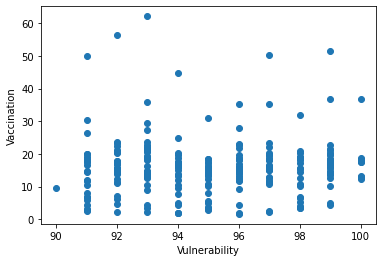

In [7]:
x_values = vaccination_df.sort_values('Social Vulnerability Index (SVI)', ascending=False)['Social Vulnerability Index (SVI)'].head(300)*100
y_values = vaccination_df.sort_values('Social Vulnerability Index (SVI)', ascending=False)['Percent adults fully vaccinated against COVID-19'].head(300)*100

plt.scatter(x_values, y_values)

plt.xlabel("Vulnerability")
plt.ylabel("Vaccination")

plt.show()

### US Census Reference (2019)

In [8]:
census_df = pd.read_csv(('data/US_Census2019_totals.csv'), encoding='latin-1')
census_df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
0,40,3,6,1,0,Alabama,Alabama,4779736,4780125,4785437,...,1.917501,0.578434,1.186314,1.522549,0.563489,0.626357,0.745172,1.090366,1.773786,2.483744
1,50,3,6,1,1,Alabama,Autauga County,54571,54597,54773,...,4.847310,6.018182,-6.226119,-3.902226,1.970443,-1.712875,4.777171,0.849656,0.540916,4.560062
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183112,...,24.017829,16.641870,17.488579,22.751474,20.184334,17.725964,21.279291,22.398256,24.727215,24.380567
3,50,3,6,1,5,Alabama,Barbour County,27457,27455,27327,...,-5.690302,0.292676,-6.897817,-8.132185,-5.140431,-15.724575,-18.238016,-24.998528,-8.754922,-5.165664
4,50,3,6,1,7,Alabama,Bibb County,22915,22915,22870,...,1.385134,-4.998356,-3.787545,-5.797999,1.331144,1.329817,-0.708717,-3.234669,-6.857092,1.831952


In [9]:
census_2019 = census_df[['STATE', 'COUNTY', 'STNAME', 'CTYNAME', 'POPESTIMATE2019']]
census_2019.head()

,STATE,COUNTY,STNAME,CTYNAME,POPESTIMATE2019
0,1,0,Alabama,Alabama,4903185
1,1,1,Alabama,Autauga County,55869
2,1,3,Alabama,Baldwin County,223234
3,1,5,Alabama,Barbour County,24686
4,1,7,Alabama,Bibb County,22394


In [10]:
state_2019 = census_2019.loc[census_2019['COUNTY']==0]
state_2019.reset_index(inplace=True, drop=True)
# state_2019['POPESTIMATE2019'].sum()
state_2019

,STATE,COUNTY,STNAME,CTYNAME,POPESTIMATE2019
0,1,0,Alabama,Alabama,4903185
1,2,0,Alaska,Alaska,731545
2,4,0,Arizona,Arizona,7278717
3,5,0,Arkansas,Arkansas,3017804
4,6,0,California,California,39512223
5,8,0,Colorado,Colorado,5758736
6,9,0,Connecticut,Connecticut,3565287
7,10,0,Delaware,Delaware,973764
8,11,0,District of Columbia,District of Columbia,705749
9,12,0,Florida,Florida,21477737


In [11]:
county_2019 = census_2019.drop(census_2019.index[census_2019["COUNTY"]==0])
county_2019

,STATE,COUNTY,STNAME,CTYNAME,POPESTIMATE2019
1,1,1,Alabama,Autauga County,55869
2,1,3,Alabama,Baldwin County,223234
3,1,5,Alabama,Barbour County,24686
4,1,7,Alabama,Bibb County,22394
5,1,9,Alabama,Blount County,57826
...,...,...,...,...,...
3188,56,37,Wyoming,Sweetwater County,42343
3189,56,39,Wyoming,Teton County,23464
3190,56,41,Wyoming,Uinta County,20226
3191,56,43,Wyoming,Washakie County,7805


In [12]:
fips = []
for index, row in  county_2019.iterrows():
    fips.append(f'{row["STATE"]:>02}{row["COUNTY"]:>03}')
    
county_2019.insert(0, 'FIPS Code', fips)
county_2019.drop(labels=['STATE', 'COUNTY'], axis=1, inplace=True)

In [13]:
county_2019

,FIPS Code,STNAME,CTYNAME,POPESTIMATE2019
1,01001,Alabama,Autauga County,55869
2,01003,Alabama,Baldwin County,223234
3,01005,Alabama,Barbour County,24686
4,01007,Alabama,Bibb County,22394
5,01009,Alabama,Blount County,57826
...,...,...,...,...
3188,56037,Wyoming,Sweetwater County,42343
3189,56039,Wyoming,Teton County,23464
3190,56041,Wyoming,Uinta County,20226
3191,56043,Wyoming,Washakie County,7805


In [14]:
county_2019.shape

(3142, 4)

### Pendiente
- Agregar Male/Female
- Agregar AgeGroup
- Mover Ethnicity (desde Vaccination) en número / % ???


### Nomenclatura AGEGRP de US Census a age_group


In [15]:
import numpy as np

all_data = pd.read_csv("data/cc-est2019-alldata.csv", encoding='latin-1')
all_data.head()

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,...,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
0,50,1,1,Alabama,Autauga County,1,0,54571,26569,28002,...,607,538,57,48,26,32,9,11,19,10
1,50,1,1,Alabama,Autauga County,1,1,3579,1866,1713,...,77,56,9,5,4,1,0,0,2,1
2,50,1,1,Alabama,Autauga County,1,2,3991,2001,1990,...,64,66,2,3,2,7,2,3,2,0
3,50,1,1,Alabama,Autauga County,1,3,4290,2171,2119,...,51,57,13,7,5,5,2,1,1,1
4,50,1,1,Alabama,Autauga County,1,4,4290,2213,2077,...,48,44,7,5,0,2,2,1,3,1


In [16]:
age_conditions = [
    (all_data['AGEGRP'] == 0),
    (all_data['AGEGRP'] >= 1) & (all_data['AGEGRP'] <= 4),
    (all_data['AGEGRP'] >= 5) & (all_data['AGEGRP'] <= 10),
    (all_data['AGEGRP'] >= 11) & (all_data['AGEGRP'] <= 13),
    (all_data['AGEGRP'] >= 14) & (all_data['AGEGRP'] <= 18) 
]

age_values = ['0', '0 - 17 years', '18 - 49 years', '50 - 64 years', '65 + years']

In [17]:
all_data['Age_group'] = np.select(age_conditions, age_values)
all_data.head()

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,...,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE,Age_group
0,50,1,1,Alabama,Autauga County,1,0,54571,26569,28002,...,538,57,48,26,32,9,11,19,10,0
1,50,1,1,Alabama,Autauga County,1,1,3579,1866,1713,...,56,9,5,4,1,0,0,2,1,0 - 17 years
2,50,1,1,Alabama,Autauga County,1,2,3991,2001,1990,...,66,2,3,2,7,2,3,2,0,0 - 17 years
3,50,1,1,Alabama,Autauga County,1,3,4290,2171,2119,...,57,13,7,5,5,2,1,1,1,0 - 17 years
4,50,1,1,Alabama,Autauga County,1,4,4290,2213,2077,...,44,7,5,0,2,2,1,3,1,0 - 17 years


In [18]:
county_2019.head()

,FIPS Code,STNAME,CTYNAME,POPESTIMATE2019
1,01001,Alabama,Autauga County,55869
2,01003,Alabama,Baldwin County,223234
3,01005,Alabama,Barbour County,24686
4,01007,Alabama,Bibb County,22394
5,01009,Alabama,Blount County,57826


In [19]:
all_data = all_data.loc[all_data['AGEGRP']==0]


In [23]:
all_data = all_data.loc[all_data['YEAR']==12]
all_data.reset_index(inplace=True, drop=True)

In [24]:
fips_alldata = []
for index, row in  all_data.iterrows():
    fips_alldata.append(f'{row["STATE"]:>02}{row["COUNTY"]:>03}')
    
all_data.insert(0, 'FIPS Code', fips)
all_data.drop(labels=['STATE', 'COUNTY'], axis=1, inplace=True)

In [25]:
county_2019= 

,FIPS Code,SUMLEV,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,...,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE,Age_group
0,01001,50,Alabama,Autauga County,12,0,55869,27092,28777,20878,...,687,89,93,40,27,15,19,16,11,0
1,01003,50,Alabama,Baldwin County,12,0,223234,108247,114987,94810,...,4646,268,281,264,197,69,65,55,35,0
2,01005,50,Alabama,Barbour County,12,0,24686,13064,11622,6389,...,408,63,50,61,26,1,0,14,8,0
3,01007,50,Alabama,Bibb County,12,0,22394,11929,10465,8766,...,253,32,19,6,15,5,1,17,3,0
4,01009,50,Alabama,Blount County,12,0,57826,28472,29354,27258,...,2516,76,58,67,66,18,21,34,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,50,Wyoming,Sweetwater County,12,0,42343,21808,20535,20446,...,2997,83,73,212,196,33,36,16,9,0
3138,56039,50,Wyoming,Teton County,12,0,23464,12142,11322,11567,...,1578,25,23,105,81,16,15,12,7,0
3139,56041,50,Wyoming,Uinta County,12,0,20226,10224,10002,9753,...,840,17,23,82,111,3,12,8,2,0
3140,56043,50,Wyoming,Washakie County,12,0,7805,3963,3842,3759,...,489,7,9,54,59,7,8,4,2,0


### Covid-19 Case Surveillance


In [21]:
from datetime import datetime
date_month = datetime.strptime(months[3], '%Y-%m')
date_month

NameError: name 'months' is not defined

In [ ]:
type(fields)
print(fields)

In [ ]:
query_url = "https://data.cdc.gov/resource/n8mc-b4w4.json?"

params = {
    '$$app_token': cdc_token,
    '$limit': 25000000,
    '$offset': 0,
    'case_month': months[11],
    '$select': fields
}

In [ ]:
## Dependencies
import pandas as pd
import requests
import matplotlib.pyplot as plt

# Import API key
from app_tokens import cdc_token

In [ ]:
months = ['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
          '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
          '2021-01', '2021-02', '2021-03', '2021-04']

fields = 'case_month, county_fips_code, current_status, sex, age_group, race, ethnicity, hosp_yn, icu_yn, death_yn'

patients_df = pd.DataFrame(index=fips)
hospitalized_df = pd.DataFrame(index=fips)
icu_df = pd.DataFrame(index=fips)
death_df = pd.DataFrame(index=fips)

In [ ]:
query_url = "https://data.cdc.gov/resource/n8mc-b4w4.json?"
params = {
    '$$app_token': cdc_token,
    '$limit': 25000000,
    '$offset': 0,
    '$select': fields
}

In [ ]:
months = ['2020-01']

for month in months:
    query_url = "https://data.cdc.gov/resource/n8mc-b4w4.json?"
    params = {
        '$$app_token': cdc_token,
        '$limit': 25000000,
        '$offset': 0,
        'case_month': month,
        '$select': fields
    }
    response_month = requests.get(query_url, params=params).json()
    response_df = pd.DataFrame(response_month)

    patients_df[month] = response_df[['county_fips_code', 'case_month']].groupby('county_fips_code').count()
#     hospitalized_df[month] = response_df[['county_fips_code', 'case_month']].groupby('county_fips_code').count()
#     patients_df[month] = response_df[['county_fips_code', 'case_month']].groupby('county_fips_code').count()
#     patients_df[month] = response_df[['county_fips_code', 'case_month']].groupby('county_fips_code').count()
    

In [ ]:
response_df['hosp_yn'].value_counts()

In [ ]:
hospitalized_df = response_df.loc[response_df['hosp_yn'] == 'Yes']

In [ ]:
abc_df = pd.DataFrame(hospitalized_df.groupby('county_fips_code').count()['hosp_yn'])
abc_df

In [ ]:
response_month = requests.get(query_url, params=params).json()

In [ ]:
patients_df['month'] = response_df[['county_fips_code', 'case_month']].groupby('county_fips_code').count()

In [ ]:
patients_df

In [ ]:
# response_month
len(response_month)

In [ ]:
response_df = pd.DataFrame(response_month)
response_df

In [ ]:
# response_df['date'] = pd.to_datetime(response_df['case_month'])
# response_df

In [ ]:
example = response_df[['county_fips_code', 'case_month']].groupby('county_fips_code').count()
example

In [ ]:
(response_df[['county_fips_code', 'sex']].groupby('county_fips_code').count())

In [ ]:
response_df.groupby('county_fips_code')['sex'].value_counts()

In [ ]:
response_df.groupby('sex')['county_fips_code'].value_counts()

### Pendientes

1. Un DF con 18 meses (columnas) por: Deidentified Patients, Hosp_YN, ICU_YN, Death_YN
2. Al final, agregar suma de todos los meses
3. Un DF con todos los totales [patients, hosp, ]
4. Un DF con todos los totales [patients, hosp, ] (por c/100k hab)
    (total*pop/100,000)
5. Agregar Columna  Vacunados en 4 y 5


### Gráficas

...Peores fips por definir

1. Vacunados vs. tiempo (total/estado) + Pacientes vs. tiempo
2. Línea de tiempo (peores fips) vacunados vs afectados
3. Caracterizar (sexo, edad, etnicidad) a la media de los peores fips vs media mejores fips
4. Peores/Mejores fips: Avance vacunación (stacked bars)
5. Scatter (pacientes, vacunados) por fips
    a. Pearson + LinRegress
6. Heatmap (vacunación vs. afectados)
7. Regresiones por sexo, edad, grupo étnico
8. Barras agrupadas por grupo étnico





### Respaldo Mariana

In [ ]:
import pandas as pd
import sqlalchemy
from sodapy import Socrata

socrata_domain = 'data.cdc.gov'
socrata_dataset_identifier = "n8mc-b4w4"

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata(socrata_domain, None)

#Get metadata
metadata = client.get_metadata(socrata_dataset_identifier)
[x['name'] for x in metadata['columns']]

In [ ]:
results = client.get(socrata_dataset_identifier,limit = 24441351,
                      #where = "current_status"=="Laboratory-confirmed case",
                     select="county_fips_code,case_month,current_status,sex,age_group,race,ethnicity,hosp_yn,icu_yn,death_yn"
                    )
                    
tryout_df = pd.DataFrame.from_records(results)

In [ ]:
tryout_df.head()

In [ ]:
tryout_df['current_status'].value_counts()

In [ ]:
url = https://data.cdc.gov/resource/n8mc-b4w4.json?case_month=2020-12&current_status=Laboratory-confirmed case